In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', \
           'tab:grey', 'tab:olive', 'tab:cyan', 'lime', 'navy', 'fuchsia', 'm']

## Triadic Census
Note that the triadic census for the groups (such as *Liberal + Libertarian* and *Overall*) were obtained by generating a network with all nodes/edges in the included subreddits; not simply by combining the triadic censes of the individual subreddits.

In [3]:
df = pd.read_csv('results/reddit_reply.csv',index_col=0)
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval).transpose()
del df['003']
del dims['003']
dims = dims.transpose()
print(df)

                                                      012          102  \
Anarchism                                        76196181     49542003   
Anarcho_Capitalism                              151526883    110704179   
Anarchy101                                        1608735      1437508   
Conservative                                    223525242    113735424   
conservatives                                      492631       384263   
Liberal                                           7847156      4736751   
Libertarian                                     980435790    571689916   
politics                                      65768807965  28293909955   
Republican                                        3655098      2194233   
socialism                                       148415024     95156403   
Anarchism + Anarcho_Capitalism + Anarchy101     461651523    330054360   
Conservative + conservatives                    242676059    126828651   
Liberal + Libertarian                 

## Triadic Census Plot

<IPython.core.display.Javascript object>


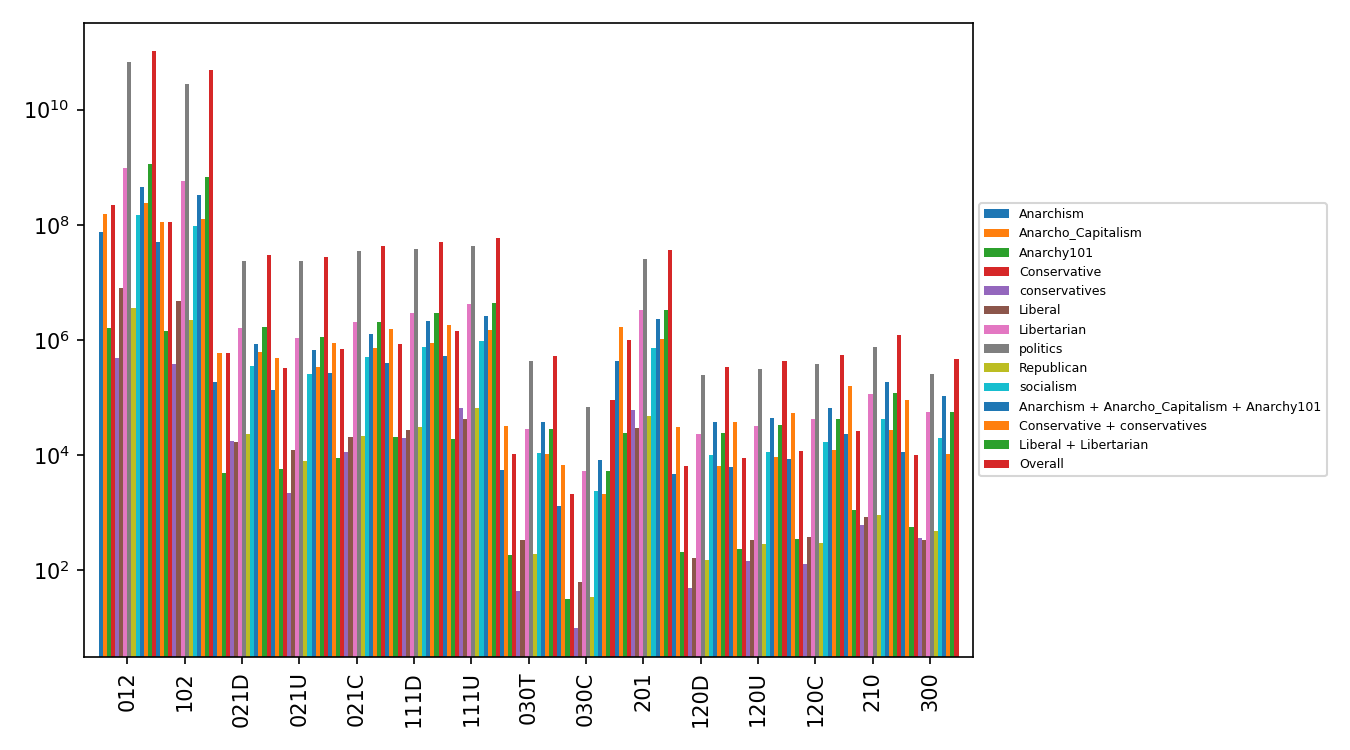

In [4]:
df.transpose().plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,5), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Weighted Average

In [8]:
average = df.divide(df.sum(axis=1), axis=0).dot(dims)
print(average)

                                            transitivity equality rationality
Anarchism                                     0.00135874  1.40211     1.52709
Anarcho_Capitalism                            0.00462561    1.434     1.51097
Anarchy101                                    0.00259463  1.48142     1.49441
Conservative                                  0.00056226  1.34645     1.54669
conservatives                                 0.00437631  1.57083      1.4228
Liberal                                      0.000493457  1.38292     1.53524
Libertarian                                  0.000558355  1.37388     1.53872
politics                                     6.08472e-05  1.30174     1.56545
Republican                                    0.00116026  1.39857     1.52381
socialism                                     0.00129775  1.39791     1.52886
Anarchism + Anarcho_Capitalism + Anarchy101   0.00183892  1.42268     1.52072
Conservative + conservatives                 0.000530046  1.3520

## Weighted Average Plot
Note that the *Overall* weighted average may be similar to the *politics* weighted average in the 3 dimensions because *politics* data makes up a disporportionately large percentage of *Overall* data. Compared to other subreddits, *politics* had by far the most nodes and edges.

<IPython.core.display.Javascript object>


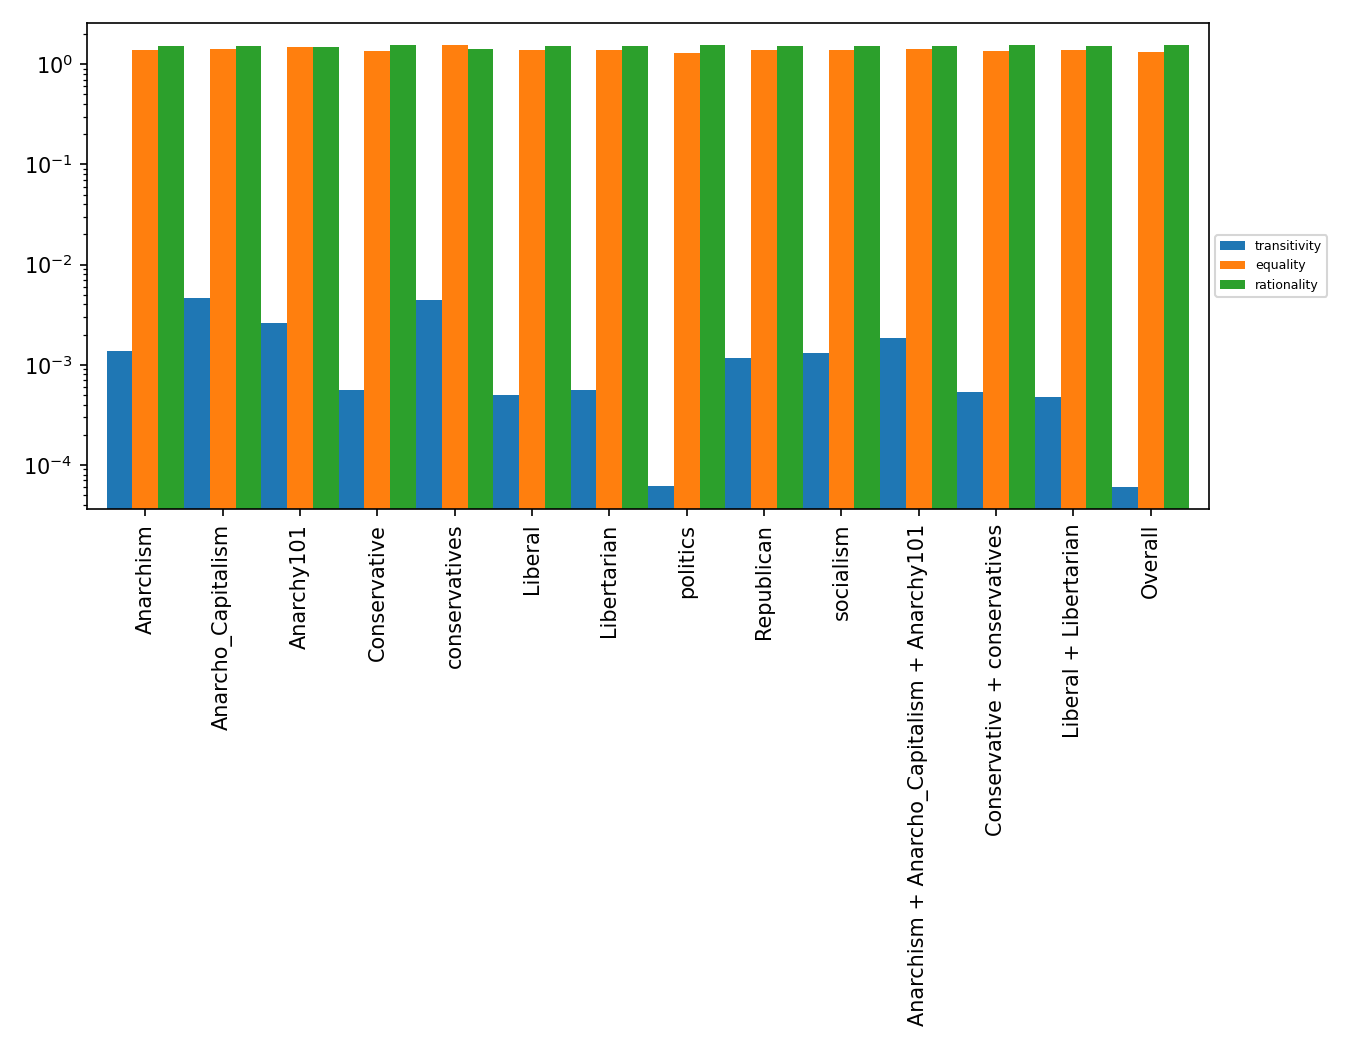

In [9]:
average.plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,7), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


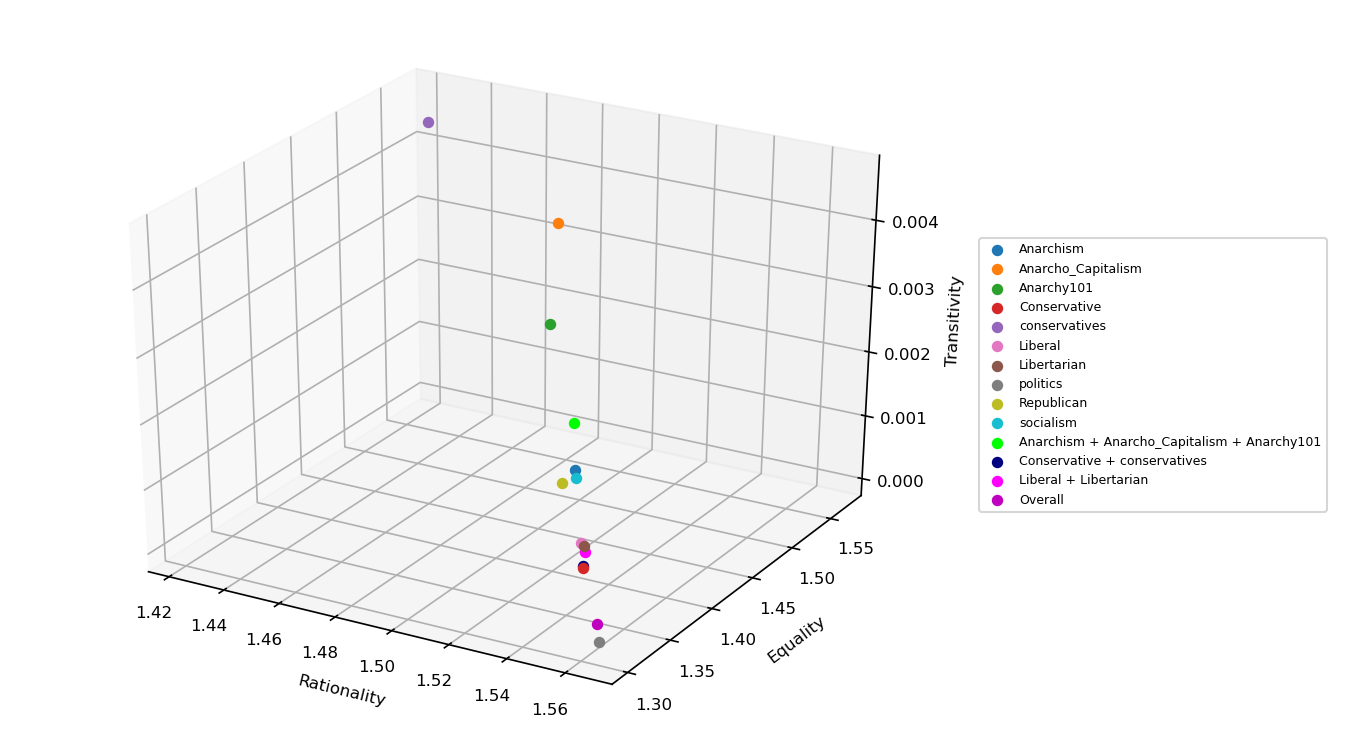

In [10]:
plot = plt.figure(figsize=(9, 5)).gca(projection='3d')
index = 0
for name, row in average.iterrows():
    plot.scatter(row['rationality'], row['equality'], row['transitivity'], label=name, c=colours[index])
    index += 1
plot.set_xlabel('Rationality', fontsize=8)
plot.set_ylabel('Equality', fontsize=8)
plot.set_zlabel('Transitivity', fontsize=8)
plot.tick_params(axis='both', labelsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Notes

* Todo: statistical significane (p-value)
* Dataset: William L. Hamilton*, Justine Zhang*, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky, Jure Leskovec. Loyalty in Online Communities. (Currently under review at WWW 2017). *Equal contribution. http://snap.stanford.edu/data/web-RedditNetworks.html